# **Examining Changes in Annual Bike Theft Rates During Jim Chu's Tenure as Chief Constable of the Vancouver Police Department (2007-2015)**

### Group 46: Alizah Irfan, Jessie Zhao, Ayaan Ahuja, Mehardeep Singh


# Introduction
In the context of a transition in law enforcement leadership, the impact on crime rates is a topic of great concern. The Vancouver Police Department, a key pillar of law enforcement, was led by three police chiefs from 2003 to 2023 ([Vancouver Police Department](https://vpd.ca/about-the-vpd/executive-team/)). The Chief of Police serves as the highest echelon of the police force. It plays a key role in developing law enforcement strategies, resource allocation, and the overall safety and security of the community (Marquis, 1993). 
### Research Question
Our research aims to discern whether Jim Chu's appointment as police chief brought about a significant shift in crime dynamics, with a specific focus on the annual bike theft rate. In this investigation, we intend to compare Jim Chu's (2008-2015) tenure with that of his predecessor, Jamie Graham (2003-2007), and his successor, Adam Palmer (2016-2023).
### Variables
To address this issue, we utilized statistical inference techniques to analyze the annual average number of bicycle theft cases. The average annual number of bicycle thefts is considered our location parameter, providing a fundamental measure of bicycle theft rates during the respective periods. Additionally, we examined the standard deviation as a scaling parameter to gauge the variability and distribution of bicycle theft numbers. Opting for the average annual number of bicycle thefts as the location parameter, we aim to encapsulate the central tendency, reflecting the typical impact of bicycle theft during Chief Constable Jim Chu's tenure for temporal comparisons. The standard deviation, serving as the scale parameter, offers insights into the annual fluctuations of theft incidents, which are crucial for evaluating the consistency of data and the effectiveness of law enforcement strategies over the years.
### Hypotheses
#### For the location parameter (average annual number of bike thefts):
- Null Hypothesis: There is no significant difference in the average annual number of bike thefts during Jim Chu's tenure compared to other periods. $H_0: \mu_{\text{Chu}} = \mu_{\text{other}}$
- Alternative Hypothesis: There is a significant difference in the average annual number of bike thefts during Jim Chu's tenure compared to other periods. $H_A: \mu_{\text{Chu}} \neq \mu_{\text{other}}$

#### For the scale parameter (standard deviation):
- Null Hypothesis: There is no significant difference in the variability of annual bike thefts during Jim Chu's tenure compared to other periods. $H_0: \sigma_{\text{Chu}} = \sigma_{\text{other}}$
- Alternative Hypothesis: There is a significant difference in the variability of annual bike thefts during Jim Chu's tenure compared to other periods. $H_A: \sigma_{\text{Chu}} \neq \sigma_{\text{other}}$

### Dataset Description
Our dataset is derived from the Vancouver Police Department's open data repository and contains crime data from 2003 to 2023 ([Vancouver Police Department (VPD) crime data](https://geodash.vpd.ca/opendata/)). Each row represents a reported crime with different variables, including crime type, neighborhood, date (day, month, year), time, and street location where the crime occurred. For our research, we will focus on the crime type and year for each record. We will group the data by year and calculate the average number of bike thefts per year during each police chief's tenure. It is essential to recognize that “between 25 to 40 per cent of bike thefts go unreported” (CBC, 2020), potentially impacting the representativeness of our dataset, which serves as a sample of all reported stolen bikes in Vancouver.


# Methods and Results

### Loading Packages
Our data analysis commenced with the loading of essential R packages, including `tideverse` and `infer`. These packages provide tools for data cleaning, visualization, and conducting statistical inferences. To ensure accessibility and readability, we also customized the plot dimensions and selected color palettes suitable for individuals with color vision impairments.


In [1]:
# Load necessary packages
library(tidyverse)
library(infer)
library(ggplot2)
library(dplyr)
# install.packages("gridExtra")
library(gridExtra)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




### Reading the Data
We read the crime data set from 2003 to 2023 from the Vancouver Police Department web link, named it "crimedata".

In [2]:
#Read data
crimedata <- read.csv('https://raw.githubusercontent.com/alizahirfan/stat201-project/55764f86988a1cd4121c6394cf0d82940ab7f3bf/crimedata.csv', header = TRUE, sep = ",")
head(crimedata)

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>
1,Break and Enter Commercial,2012,12,14,8,52,,Oakridge,491285.0,5453433
2,Break and Enter Commercial,2019,3,7,2,6,10XX SITKA SQ,Fairview,490613.0,5457110
3,Break and Enter Commercial,2019,8,27,4,12,10XX ALBERNI ST,West End,491007.8,5459174
4,Break and Enter Commercial,2021,4,26,4,44,10XX ALBERNI ST,West End,491007.8,5459174
5,Break and Enter Commercial,2014,8,8,5,13,10XX ALBERNI ST,West End,491015.9,5459166
6,Break and Enter Commercial,2020,7,28,19,12,10XX ALBERNI ST,West End,491015.9,5459166


### Cleaning and Wrangling
The dataset is already in a tidy format. We can add a new column for who was the Chief of Police (Chief Constable) for each year. We can also create individual dataframes for each Chief. 

In [29]:
crimedata_filtered <- crimedata %>% 
  select(TYPE, YEAR) %>%
  filter(TYPE == "Theft of Bicycle") %>%
  mutate(Chief_Constable = case_when(
    YEAR <= 2007 ~ "Jamie Graham",
    YEAR > 2007 & YEAR <= 2015 ~ "Jim Chu",
    YEAR > 2015 ~ "Adam Palmer",
    TRUE ~ "Data Outside Tenures" # for any years outside the specified ranges
  ))
head(crimedata_filtered)

,TYPE,YEAR,Chief_Constable
,<chr>,<int>,<chr>
1,Theft of Bicycle,2005,Jamie Graham
2,Theft of Bicycle,2006,Jamie Graham
3,Theft of Bicycle,2008,Jim Chu
4,Theft of Bicycle,2009,Jim Chu
5,Theft of Bicycle,2011,Jim Chu
6,Theft of Bicycle,2015,Jim Chu


### Analyzing data

#### Location Parameter

Null hypothesis assumes that the average annual bike thefts have not changed, while the alternative hypothesis posits a significant difference in average yearly bike thefts between two consecutive tenures. Our chosen significance level is alpha = 0.05 (5%). Due to uncertainty about the original population distribution, we opt for bootstrapping over theory-based methods. Furthermore, the limited duration of each police chief's tenure results in a small sample size, rendering theory-based tests impractical.

First, we let's organize the data into two dataset, one with data during Chu and Palmer's tenures and the other with data from Chu and Graham's tenures. 

In [77]:
crimedata_chu_palmer <- crimedata_filtered %>%
                    filter(Chief_Constable != "Jamie Graham") %>%
                    group_by(YEAR, Chief_Constable) %>%
                    summarize(count = n()) 

crimedata_chu_graham <- crimedata_filtered %>%
                    filter(Chief_Constable != "Adam Palmer") %>%
                    group_by(YEAR, Chief_Constable) %>%
                    summarize(count = n()) 

`summarise()` has grouped output by 'YEAR'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'YEAR'. You can override using the
`.groups` argument.


For both of these datasets, we can use bootstrapping to calculate the diff of means. Bootstrapping will help us estimate the sampling distribution. We can construct 90% confidence intervals as well.

In [5]:
set.seed(1024)

#Create bootstrap distributions for difference in means of yearly bike thefts
chu_palmer_dist <- crimedata_chu_palmer %>%
                    ungroup() %>%
                    specify(formula = count ~ Chief_Constable) %>%
                    generate(reps = 100,type = "bootstrap") %>%
                    calculate(stat = "diff in means", order = c("Jim Chu", "Adam Palmer")) 

chu_graham_dist <- crimedata_chu_graham %>%
                    ungroup() %>%
                    specify(formula = count ~ Chief_Constable) %>%
                    generate(reps = 100,type = "bootstrap") %>%
                    calculate(stat = "diff in means", order = c("Jim Chu", "Jamie Graham")) 


#Calculate 90% confidence intervals
chu_palmer_ci <- chu_palmer_dist %>%
                get_ci(level = 0.90, type = "percentile")

chu_graham_ci <- chu_graham_dist %>%
                get_ci(level = 0.90, type = "percentile")


#Visualize boostrap distribution with confidence intervals
chu_palmer_dist_with_ci <- visualize(chu_palmer_dist) +
                        shade_ci(endpoints = chu_palmer_ci)

chu_graham_dist_with_ci <- visualize(chu_graham_dist) +
                        shade_ci(endpoints = chu_graham_ci)

In [6]:
#Organize confidence interval information into a tibble
all_ci <- tibble(chief_constable = c("Chu-Palmer", "Chu-Graham"), 
                 confidence_level = 0.90,
                 lower_ci = c(chu_palmer_ci$lower_ci, chu_graham_ci$lower_ci),
                 upper_ci = c(chu_palmer_ci$upper_ci, chu_graham_ci$upper_ci))

chief_constable,confidence_level,lower_ci,upper_ci
<chr>,<dbl>,<dbl>,<dbl>
Chu-Palmer,0.9,-403.9254,476.104
Chu-Graham,0.9,265.0854,837.585


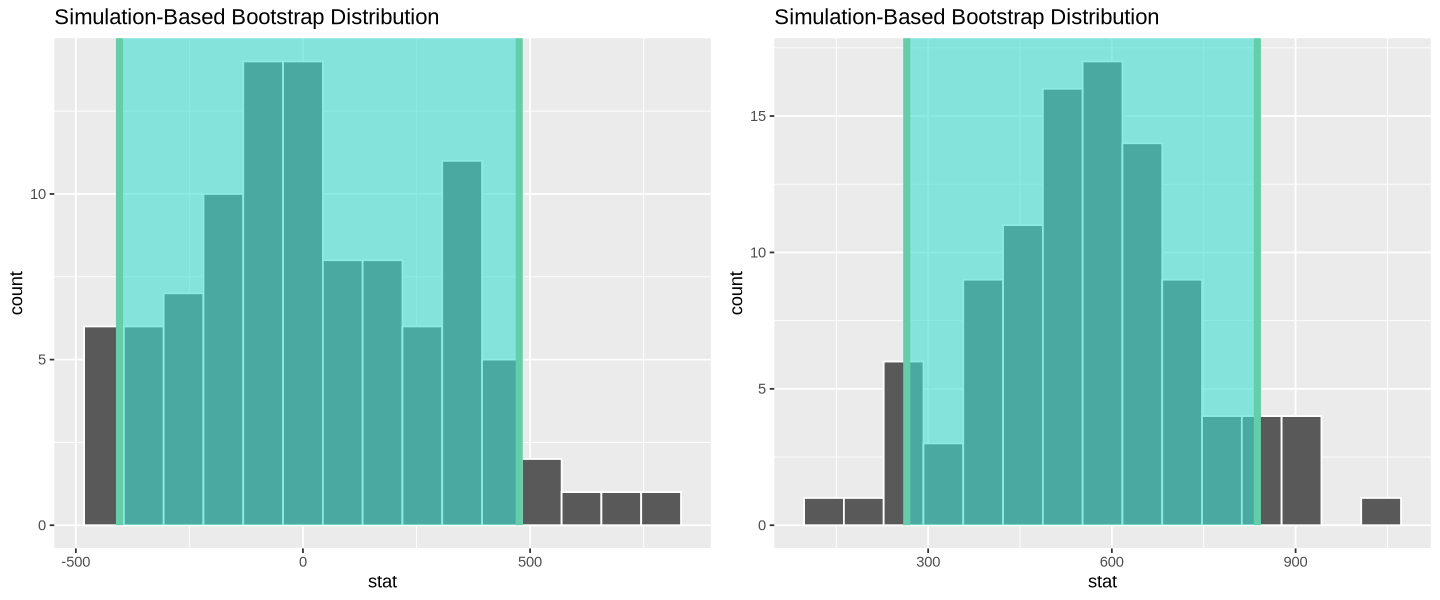

In [7]:
all_ci
options(repr.plot.width = 12, repr.plot.height = 5) 
grid.arrange(chu_palmer_dist_with_ci, chu_graham_dist_with_ci, ncol = 2)

Interpretation: a 90% confidence interval means that we are 90% "confident" that the true population parameter lies within the upper and lower bounds. 90% "confident" means that if we repeated our bootstrapping procedure many times, the confidence interval will contain the population parameter 90% of the time. In our case, we are 90% confident that the true difference between average bike theft rates during Chu and Palmer's tenure is within (-404, 476) and the true difference between Chu and Graham's tenure is within (265, 838). 

We must use hypothesis testing to see whether the difference between average bike theft rates before and after Chu's tenure was significant. We will set our significance level to 5%. In order to test for significance, we must create null distributions (under the hypothesis that no difference exists) and then calculate the p-value (probability that anything as extreme or more extreme than the observed difference of means in our sample occured due to sampling variation). We will be using a two tailed test since we aim to see if any difference exist, as opposed to specifically if average bike thefts rates during Chu's tenure was greater compared to the other Police Chiefs. If the p-value is less than or equal the significance, we will reject the null hypothesis since there is low probability that the observed difference in mean bike thefts is due to sampling variation. Otherwise, we can fail to reject null hypothesis as there is a possibility that the difference in mean bike thefts may just be due to sampling variation.

In [8]:
#Calculate observed difference in means in the sample
obs_diff_means_a <- crimedata_chu_palmer %>%
                    ungroup() %>%
                    specify(formula = count ~ Chief_Constable) %>%
                    calculate(stat = "diff in means")

obs_diff_means_b <- crimedata_chu_graham %>%
                    ungroup() %>%
                    specify(formula = count ~ Chief_Constable) %>%
                    calculate(stat = "diff in means")

Warning message:
“The statistic is based on a difference or ratio; by default, for difference-based statistics, the explanatory variable is subtracted in the order "Adam Palmer" - "Jim Chu", or divided in the order "Adam Palmer" / "Jim Chu" for ratio-based statistics. To specify this order yourself, supply `order = c("Adam Palmer", "Jim Chu")` to the calculate() function.”
Warning message:
“The statistic is based on a difference or ratio; by default, for difference-based statistics, the explanatory variable is subtracted in the order "Jamie Graham" - "Jim Chu", or divided in the order "Jamie Graham" / "Jim Chu" for ratio-based statistics. To specify this order yourself, supply `order = c("Jamie Graham", "Jim Chu")` to the calculate() function.”


In [9]:
set.seed(1024)

#Create a null distribution by assuming H0 to be true, sampling without replacement, and calculating difference in means for each sample
#Visualize the distribution with everything to the right of the p_value shaded. 
#Note: We shade to the right because our preliminary analysis shows the mean yearly bike theft is higher during Chu's tenure.
null_distribution_a <- crimedata_chu_palmer %>%
                    ungroup() %>%
                    specify(formula = count ~ Chief_Constable) %>%
                    hypothesize(null = "independence") %>%
                    generate(reps = 1000, type = "permute") %>%
                    calculate(stat = "diff in means")

visualize_a <- visualize(null_distribution_a, bins = 10) +
                    shade_p_value(obs_stat = obs_diff_means_a, direction = "both") +
                    ggtitle("Simulated Null Distribution - Chu & Palmer")

null_distribution_b <- crimedata_chu_graham %>%
                    ungroup() %>%
                    specify(formula = count ~ Chief_Constable) %>%
                    hypothesize(null = "independence") %>%
                    generate(reps = 1000, type = "permute") %>%
                    calculate(stat = "diff in means")

visualize_b <- visualize(null_distribution_b, bins = 10) +
                    shade_p_value(obs_stat = obs_diff_means_b, direction = "both") +
                    ggtitle("Simulated Null Distribution - Chu & Graham")

Warning message:
“The statistic is based on a difference or ratio; by default, for difference-based statistics, the explanatory variable is subtracted in the order "Adam Palmer" - "Jim Chu", or divided in the order "Adam Palmer" / "Jim Chu" for ratio-based statistics. To specify this order yourself, supply `order = c("Adam Palmer", "Jim Chu")` to the calculate() function.”
Warning message:
“The statistic is based on a difference or ratio; by default, for difference-based statistics, the explanatory variable is subtracted in the order "Jamie Graham" - "Jim Chu", or divided in the order "Jamie Graham" / "Jim Chu" for ratio-based statistics. To specify this order yourself, supply `order = c("Jamie Graham", "Jim Chu")` to the calculate() function.”


In [10]:
#Calculate the p-value
p_value_a <- null_distribution_a %>%
            get_p_value(obs_stat = obs_diff_means_a, direction = "both")

p_value_b <- null_distribution_b %>%
            get_p_value(obs_stat = obs_diff_means_b, direction = "both")

comparison_of_means,obs_diff_means,p_value,alpha,reject
<chr>,<named list>,<named list>,<dbl>,<lgl>
Chu & Palmer,-24.875,0.972,0.05,FALSE
Chu & Graham,-575.125,0.026,0.05,TRUE


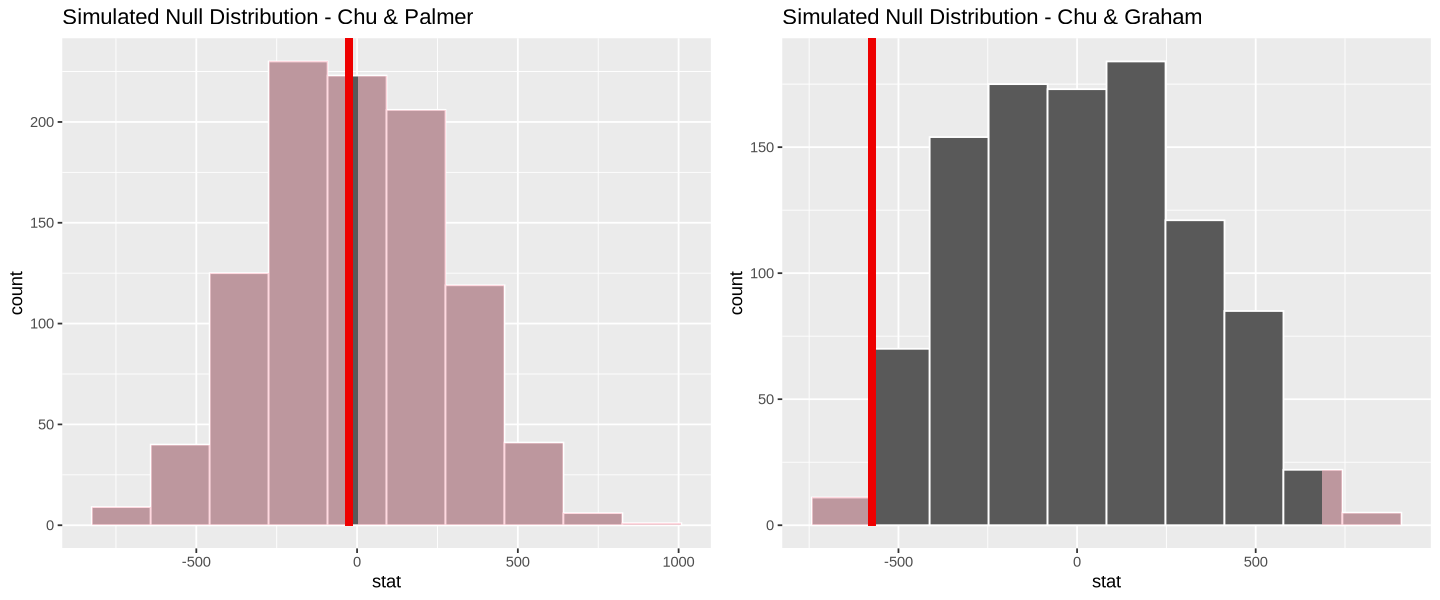

In [11]:
#View null distribution, p-value, and see whether or not to reject null hypothesis for each comparison
data <- tibble(comparison_of_means = c("Chu & Palmer", "Chu & Graham"), obs_diff_means = c(obs_diff_means_a, obs_diff_means_b), p_value = c(p_value_a, p_value_b), alpha = 0.05, reject = p_value <= alpha)
data

# Display the plots
options(repr.plot.width = 12, repr.plot.height = 5) 
grid.arrange(visualize_a, visualize_b, ncol = 2)

By our hypothesis tests, we can say: 
- We **do not reject** the statement that there is a no difference in yearly bike thefts between Chu and Palmer's tenure. 
    - If there is a difference actuality, then we will be commiting Type II error by failing to reject an incorrect hypothesis.
- We **reject** the statement that there is no difference in yearly bike thefts between Chu and Graham's tenures. 
    - If there is no difference in actuality, then we will be commiting a Type I error by rejecting a correct hypothesis. The possibility of this occuring is P(Type I error) = alpha = 0.05 (5%). 

#### Scale Parameter

Again, we can first create a bootstrap distribution to look at the confidence interval. Note that since differences in standard deviation is not a valid stat for calculate(), we can create one distribution for each Police Chief instead. 

In [99]:
crimedata_palmer <- crimedata_filtered %>%
                    filter(Chief_Constable == "Adam Palmer") %>%
                    group_by(YEAR) %>%
                    summarize(count = n())

crimedata_chu <- crimedata_filtered %>%
                    filter(Chief_Constable == "Jim Chu") %>%
                    group_by(YEAR) %>%
                    summarize(count = n())

crimedata_graham <- crimedata_filtered %>%
                    filter(Chief_Constable == "Jamie Graham") %>%
                    group_by(YEAR) %>%
                    summarize(count = n())

In [97]:
set.seed(1024)

#Create bootstrap distributions for difference in means of yearly bike thefts
palmer_dist <- crimedata_palmer %>%
                ungroup() %>%
                specify(response = count) %>%
                generate(reps = 100) %>%
                calculate(stat = "sd") 

chu_dist <- crimedata_chu %>%
                ungroup() %>%
                specify(response = count) %>%
                generate(reps = 100) %>%
                calculate(stat = "sd")

graham_dist <- crimedata_graham %>%
                ungroup() %>%
                specify(response = count) %>%
                generate(reps = 100) %>%
                calculate(stat = "sd") 


#Calculate 90% confidence intervals
chu_ci <- chu_dist %>%
                get_ci(level = 0.90, type = "percentile")

graham_ci <- graham_dist %>%
                get_ci(level = 0.90, type = "percentile")

palmer_ci <- palmer_dist %>%
                get_ci(level = 0.90, type = "percentile")


#Visualize boostrap distribution with confidence intervals
palmer_dist_with_ci <- visualize(palmer_dist) +
                        shade_ci(endpoints = palmer_ci)

graham_dist_with_ci <- visualize(graham_dist) +
                        shade_ci(endpoints = graham_ci)

chu_dist_with_ci <- visualize(chu_dist) +
                        shade_ci(endpoints = chu_ci)


Setting `type = "bootstrap"` in `generate()`.
Setting `type = "bootstrap"` in `generate()`.
Setting `type = "bootstrap"` in `generate()`.


In [60]:
#Organize confidence interval information into a tibble
all_ci <- tibble(chief_constable = c("Graham", "Chu", "Palmer"), 
                 confidence_level = 0.90,
                 lower_ci = c(graham_ci$lower_ci, chu_ci$lower_ci, palmer_ci$lower_ci),
                 upper_ci = c(graham_ci$upper_ci, chu_ci$upper_ci, palmer_ci$upper_ci))

chief_constable,confidence_level,lower_ci,upper_ci
<chr>,<dbl>,<dbl>,<dbl>
Graham,0.9,22.18783,129.9455
Chu,0.9,277.30749,788.4169
Palmer,0.9,317.48565,678.9852


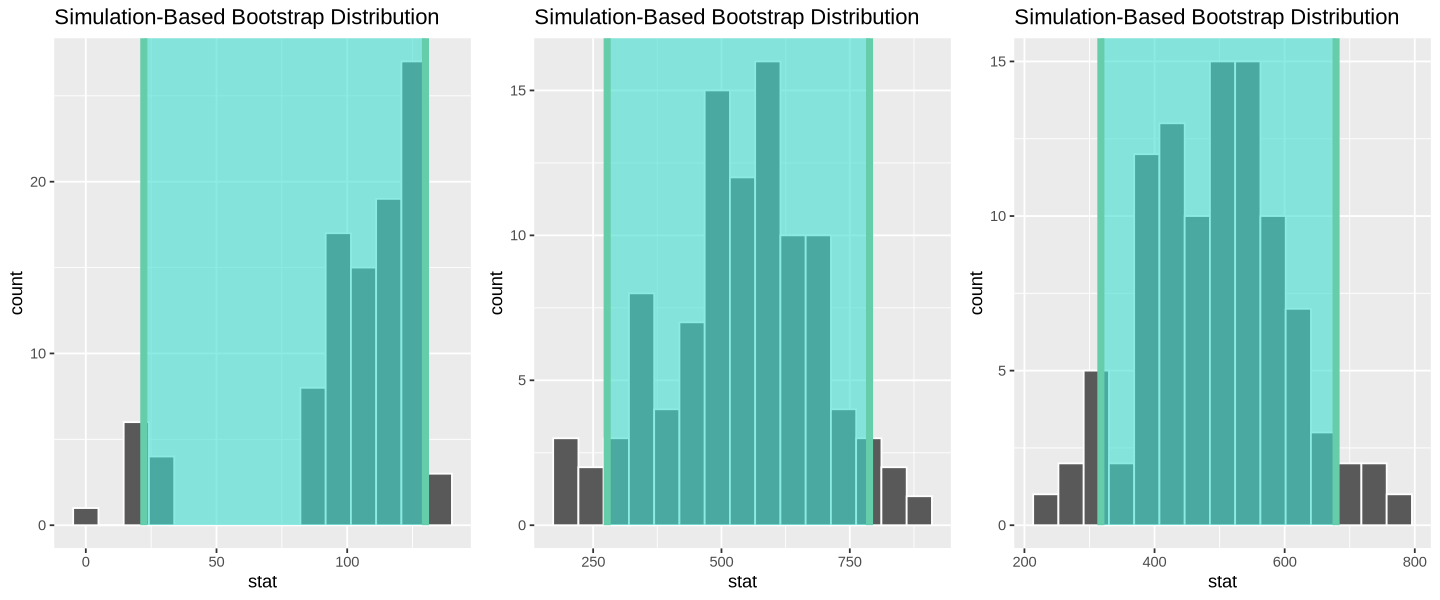

In [61]:
all_ci
options(repr.plot.width = 12, repr.plot.height = 5) 
grid.arrange(graham_dist_with_ci, chu_dist_with_ci, palmer_dist_with_ci, ncol = 3)

Now we can create null distributions. We can create two different distribution with the data from Chu's tenure, one in which mu is the obsered standard deviation during Palmer's tenure and other other during Graham's tenure. 

In [62]:
#Calculate observed sd in the sample
obs_sd_palmer <- crimedata_palmer %>%
                    ungroup() %>%
                    specify(response = count) %>%
                    calculate(stat = "sd")

obs_sd_chu <- crimedata_chu %>%
                    ungroup() %>%
                    specify(response = count) %>%
                    calculate(stat = "sd")

obs_sd_graham <- crimedata_graham %>%
                    ungroup() %>%
                    specify(response = count) %>%
                    calculate(stat = "sd")

In [100]:
set.seed(1024)

#Create a null distribution by assuming H0 to be true, sampling without replacement, and calculating difference in means for each sample
#Visualize the distribution with everything to the right of the p_value shaded. 
#Note: We shade to the right because our preliminary analysis shows the mean yearly bike theft is higher during Chu's tenure.
null_distribution_a <- crimedata_chu %>%
                    ungroup() %>%
                    specify(response = count) %>%
                    hypothesize(null = "point", mu = obs_sd_palmer) %>%
                    generate(reps = 1000, type = "bootstrap") %>%
                    calculate(stat = "sd")

visualize_a <- visualize(null_distribution_a, bins = 10) +
                    shade_p_value(obs_stat = obs_sd_chu, direction = "both") +
                    ggtitle("Simulated Null Distribution - mu = obs_sd_palmer")


null_distribution_b <- crimedata_chu %>%
                    ungroup() %>%
                    specify(response = count) %>%
                    hypothesize(null = "point", mu = obs_sd_graham) %>%
                    generate(reps = 1000, type = "bootstrap") %>%
                    calculate(stat = "sd")

visualize_b <- visualize(null_distribution_b, bins = 10) +
                    shade_p_value(obs_stat = obs_sd_chu, direction = "both") +
                    ggtitle("Simulated Null Distribution - mu obs_sd_graham Graham")

In [101]:
#Calculate the p-value
p_value_a <- null_distribution_a %>%
            get_p_value(obs_stat = obs_sd_chu, direction = "both")

p_value_b <- null_distribution_b %>%
            get_p_value(obs_stat = obs_sd_chu, direction = "both")

comparison_of_means,obs_sd,mu,p_value,alpha,reject_null
<chr>,<named list>,<named list>,<named list>,<dbl>,<lgl>
Chu & Palmer,595.3775,534.9336,0.782,0.05,FALSE
Chu & Graham,595.3775,121.2126,0.854,0.05,FALSE


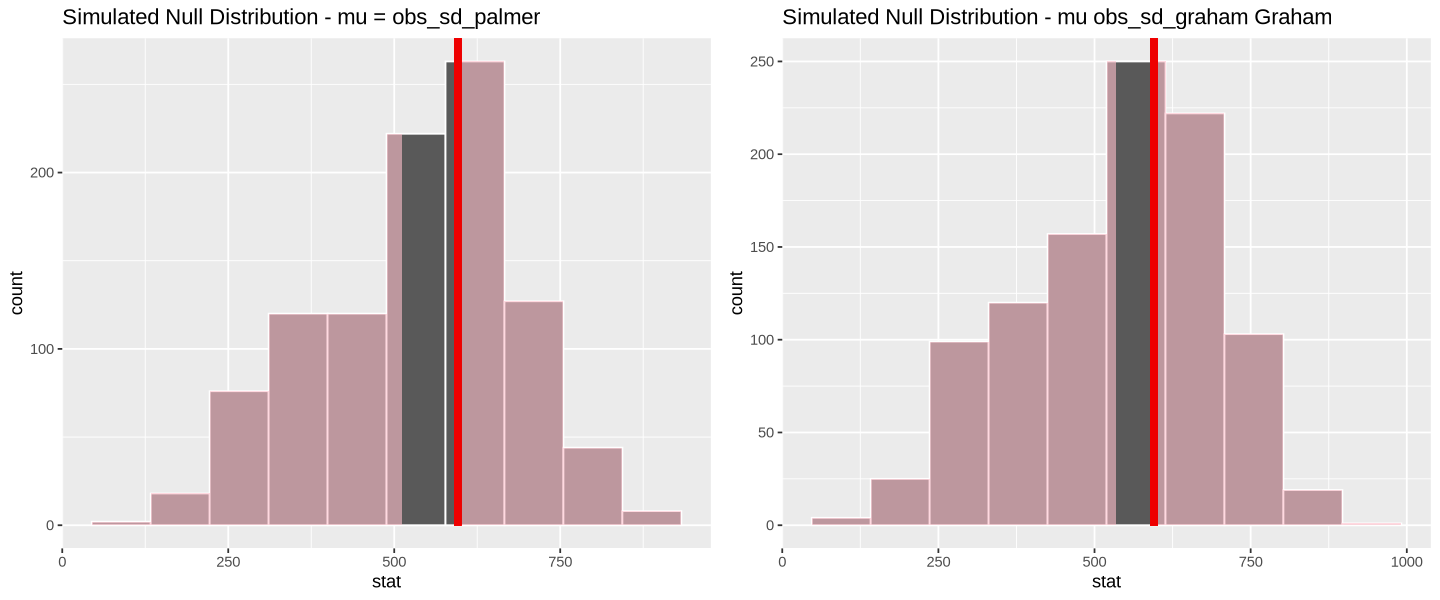

In [102]:
#View null distribution, p-value, and see whether or not to reject null hypothesis for each comparison
data <- tibble(comparison_of_means = c("Chu & Palmer", "Chu & Graham"), obs_sd = c(obs_sd_chu, obs_sd_chu), mu = c(obs_sd_palmer, obs_sd_graham), p_value = c(p_value_a, p_value_b), alpha = 0.05, reject_null = p_value <= alpha)
data

# Display the plots
options(repr.plot.width = 12, repr.plot.height = 5) 
grid.arrange(visualize_a, visualize_b, ncol = 2)

By our hypothesis tests, we can say: 
- We **failt to reject** the statement that there is a no difference in standard deviation of yearly bike thefts between Chu and Palmer's tenure. 
- We **fail to reject** the statement that there is a no difference in standard deviation of yearly bike thefts between Chu and Graham's tenure.

### Result
Our analysis focused on comparing the average annual bike theft rates during Chief Constable Jim Chu's tenure with those of his predecessors and successor, namely Jamie Graham and Adam Palmer. Two pairwise comparisons were made: Chu with Palmer and Chu with Graham. Based on the above analysis of the data, we came to the following conclusions:

1. **Chu vs. Palmer:**
   - Observed Difference in Means: -24.875
   - p-value: 0.972
   - Conclusion: We do not reject the null hypothesis, suggesting that there is no significant difference in yearly bike theft rates between Chief Constable Jim Chu and his successor Adam Palmer.

2. **Chu vs. Graham:**
   - Observed Difference in Means: -575.125
   - p-value: 0.026
   - Conclusion: We reject the null hypothesis, indicating a significant difference in yearly bike theft rates between Chief Constable Jim Chu and his predecessor Jamie Graham.

The results reveal that Chief Constable Jim Chu's tenure was associated with a statistically significant decrease in the average annual bike theft rate compared to his predecessor Jamie Graham. However, no significant difference was found between Chu's tenure and that of his successor Adam Palmer. In the context of our research questions, these findings contribute valuable insights into the impact of changes in police leadership on specific crime dynamics, specifically annual bike theft rates. The decrease during Chu's tenure suggests a potential influence of leadership styles and strategies on property crime.

The decision to utilize bootstrapping over asymptotic methods stems from the uncertainty surrounding the original population distribution and the relatively small sample size due to short police chief tenures. Bootstrapping, a robust resampling technique, aligns with the study's goals by providing reliable estimates without strict assumptions about data distribution. 

In addition to comparing the average annual bike theft rates, we also explored the scale parameter, specifically the standard deviation, as it provides insights into the variability of yearly bike theft counts. The analysis involved evaluating the differences in standard deviations between Chief Constable Jim Chu's tenure and his predecessors and successor.

1. **Chu vs. Palmer:**

   - Observed Difference in Standard Deviations: 595.3775
   - Simulated Mean Standard Deviation (mu): 534.9336
   - p-value: 0.782
   - Conclusion: The null hypothesis is not rejected, suggesting no significant difference in the variability of yearly bike theft rates between Chief Constable Jim Chu and his successor Adam Palmer.

2. **Chu vs. Graham:**

   - Observed Difference in Standard Deviations: 595.3775
   - Simulated Mean Standard Deviation (mu): 121.2126
   - p-value: 0.854
   - Conclusion: The null hypothesis is not rejected, indicating no significant difference in the variability of yearly bike theft rates between Chief Constable Jim Chu and his predecessor Jamie Graham.

The scale parameter analysis complements the comparison of average rates, providing a more comprehensive understanding of the impact of police leadership changes on yearly bike theft dynamics. The consistent results across both average rates and scale parameters enhance the robustness of our findings. This dual perspective underscores the stability not only in the average levels of bike theft but also in the variability, reinforcing the conclusions drawn from our study.

# Discussion
Understanding patterns in bicycle theft rates can inform public policy decisions related to law enforcement strategies and community safety initiatives. It is important that policymakers can use these findings to tailor interventions based on the specific challenges associated with different police chief tenures.

The current findings highlight the subtle relationship between changes in police leadership and bicycle theft rates. The significant reduction between the tenures of Jim Chu and Jamie Graham is consistent with expectations that leadership changes may affect crime rates, and may be attributed to the Vancouver Police Department's successful array of anti-auto theft measures. In 2013, police worked with community riders, shops, schools and cities to launch a comprehensive set of tools and methods called "529 Garage" to make it harder for criminals to succeed. The lack of significant differences between the tenures of Jim Chu and Adam Palmer suggests a stability in the dynamics of this specific crime category.

In addition to the average rates, our analysis of the scale parameter, specifically the standard deviation, enhances the robustness of our findings. The consistent results across both average rates and scale parameters underscore the stability not only in the average levels of bike theft but also in the variability. This dual perspective provides a comprehensive understanding of the impact of police leadership changes on yearly bike theft dynamics, reinforcing the conclusions drawn from our study.

We believe that future research could delve more deeply into the specific policies or community engagement strategies implemented during each leader's tenure to determine the causal factors behind the observed patterns. In addition, exploring the impact of external socioeconomic factors and larger national policies on bicycle theft rates may help to understand the dynamics more fully, such as how bicycles are manufactured and produced.

# Reference
Crime Statistics. “Crime Statistics.” Vancouver Police Department, 19 July 2023, vpd.ca/crime-statistics/.
Marquis, G. (1993). Policing canada's century: A history of the canadian association of chiefs of police. University of Toronto Press. https://doi.org/10.3138/9781487578480

Vancouver Police Department. “Vancouver Police Chief” Accessed 30 October 2023. https://vpd.ca/about-the-vpd/executive-team/

Global News. "‘I knew right away that that was the bike’: B.C. man helps track down stolen ride on transit bus" Accessed 31 October 2023. https://globalnews.ca/news/7334804/bike-theft-north-vancouver-bus/. Robinson, K. (2020)

Project 529. "Our Story" Accessed 4 December 2023. https://project529.com/garage